## THYROID DISEASE PREDICTION

In [1]:
#import pandas as pd
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")
#np.set_printoptions(suppress=True)

In [2]:
data= pd.read_csv("thyroidDF.csv")

#Basic information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      3772 non-null   object
 1   sex                      3772 non-null   object
 2   onthyroxine              3772 non-null   object
 3   queryonthyroxine         3772 non-null   object
 4   onantithyroidmedication  3772 non-null   object
 5   sick                     3772 non-null   object
 6   pregnant                 3772 non-null   object
 7   thyroidsurgery           3772 non-null   object
 8   I131treatment            3772 non-null   object
 9   queryhypothyroid         3772 non-null   object
 10  queryhyperthyroid        3772 non-null   object
 11  lithium                  3772 non-null   object
 12  goitre                   3772 non-null   object
 13  tumor                    3772 non-null   object
 14  hypopituitary            3772 non-null  

In [4]:
data.replace('?',np.nan,inplace=True)

In [5]:
data.isnull().sum()

age                           1
sex                         150
onthyroxine                   0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                         369
T3measured                    0
T3                          769
TT4measured                   0
TT4                         231
T4Umeasured                   0
T4U                         387
FTImeasured                   0
FTI                         385
TBGmeasured                   0
TBG                        3772
referralsource                0
binaryClass                   0
dtype: int64

In [6]:
data.median()

age     54.00
TSH      1.40
T3       2.00
TT4    103.00
T4U      0.98
FTI    107.00
TBG       NaN
dtype: float64

In [7]:
data.sex.mode()

0    F
Name: sex, dtype: object

In [8]:
data.sex.fillna(('F'),inplace=True)
data.age.fillna(int('54'),inplace=True)
data.TSH.fillna(float('1.40'),inplace=True)
data.T3.fillna(float('2'),inplace=True)
data.TT4.fillna(float('103'),inplace=True)
data.T4U.fillna(float('0.98'),inplace=True)
data.FTI.fillna(float('104'),inplace=True)
data.drop(["TBG"],axis=1,inplace=True)

In [9]:
data.isnull().sum()

age                        0
sex                        0
onthyroxine                0
queryonthyroxine           0
onantithyroidmedication    0
sick                       0
pregnant                   0
thyroidsurgery             0
I131treatment              0
queryhypothyroid           0
queryhyperthyroid          0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
psych                      0
TSHmeasured                0
TSH                        0
T3measured                 0
T3                         0
TT4measured                0
TT4                        0
T4Umeasured                0
T4U                        0
FTImeasured                0
FTI                        0
TBGmeasured                0
referralsource             0
binaryClass                0
dtype: int64

In [10]:
data.nunique()

age                         94
sex                          2
onthyroxine                  2
queryonthyroxine             2
onantithyroidmedication      2
sick                         2
pregnant                     2
thyroidsurgery               2
I131treatment                2
queryhypothyroid             2
queryhyperthyroid            2
lithium                      2
goitre                       2
tumor                        2
hypopituitary                2
psych                        2
TSHmeasured                  2
TSH                        288
T3measured                   2
T3                          70
TT4measured                  2
TT4                        242
T4Umeasured                  2
T4U                        147
FTImeasured                  2
FTI                        235
TBGmeasured                  1
referralsource               5
binaryClass                  2
dtype: int64

In [11]:
data.duplicated().sum()

63

In [12]:
data.shape

(3772, 29)

In [13]:
data['age']=data['age'].astype("int")
data['FTI']=data['FTI'].astype("float")
data['T4U']=data['T4U'].astype("float")
data['TT4']=data['TT4'].astype("float")
data['TSH']=data['TSH'].astype("float")
data['T3']=data['T3'].astype("float")

In [14]:
data.dtypes

age                          int32
sex                         object
onthyroxine                 object
queryonthyroxine            object
onantithyroidmedication     object
sick                        object
pregnant                    object
thyroidsurgery              object
I131treatment               object
queryhypothyroid            object
queryhyperthyroid           object
lithium                     object
goitre                      object
tumor                       object
hypopituitary               object
psych                       object
TSHmeasured                 object
TSH                        float64
T3measured                  object
T3                         float64
TT4measured                 object
TT4                        float64
T4Umeasured                 object
T4U                        float64
FTImeasured                 object
FTI                        float64
TBGmeasured                 object
referralsource              object
binaryClass         

In [15]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.736479,4.726104,2.010748,107.993584,0.993461,109.809305
std,20.082329,23.316598,0.738282,34.520088,0.185212,31.416216
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,104.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [16]:
data.describe(include=object)

,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,queryhyperthyroid,...,hypopituitary,psych,TSHmeasured,T3measured,TT4measured,T4Umeasured,FTImeasured,TBGmeasured,referralsource,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,P
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [17]:
#filter the continous data
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
1,23,4.10,2.0,102.0,0.98,104.0
2,46,0.98,2.0,109.0,0.91,120.0
3,70,0.16,1.9,175.0,0.98,104.0
4,70,0.72,1.2,61.0,0.87,70.0
...,...,...,...,...,...,...
3767,30,1.40,2.0,103.0,0.98,104.0
3768,68,1.00,2.1,124.0,1.08,114.0
3769,74,5.10,1.8,112.0,1.07,105.0
3770,72,0.70,2.0,82.0,0.94,87.0


In [18]:
data_numeric.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

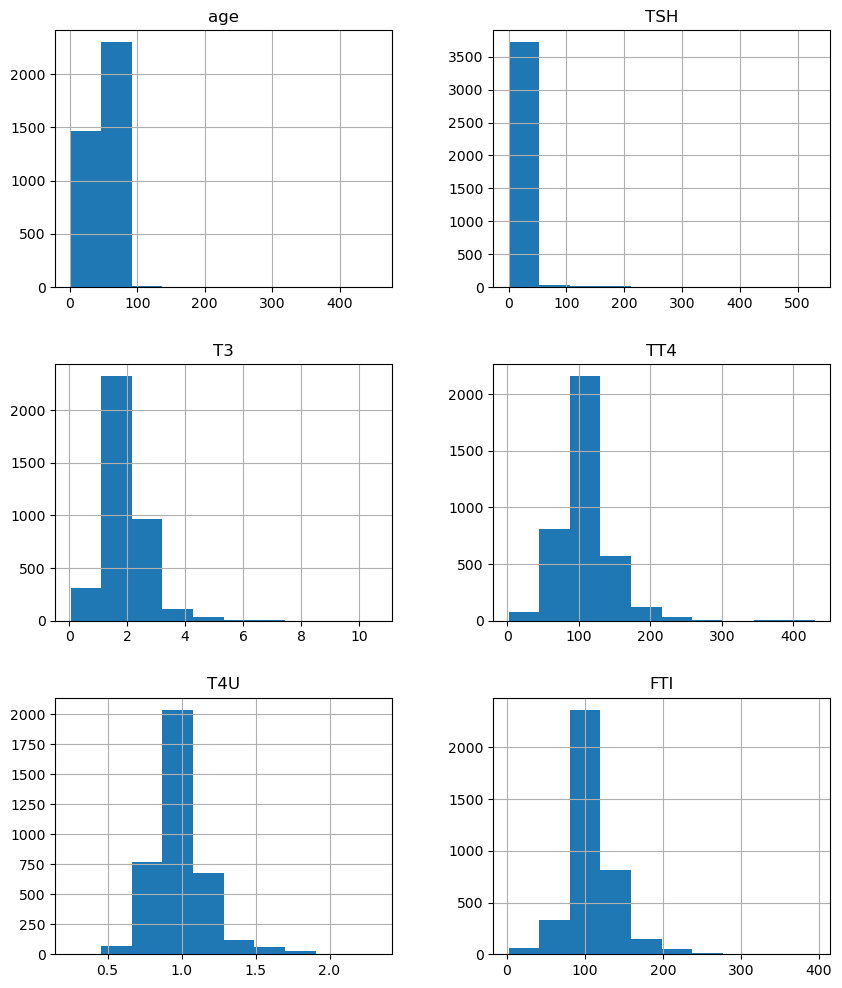

In [19]:
data_numeric.hist(bins=10,figsize=(10,12))
plt.show()

<AxesSubplot:xlabel='FTI'>

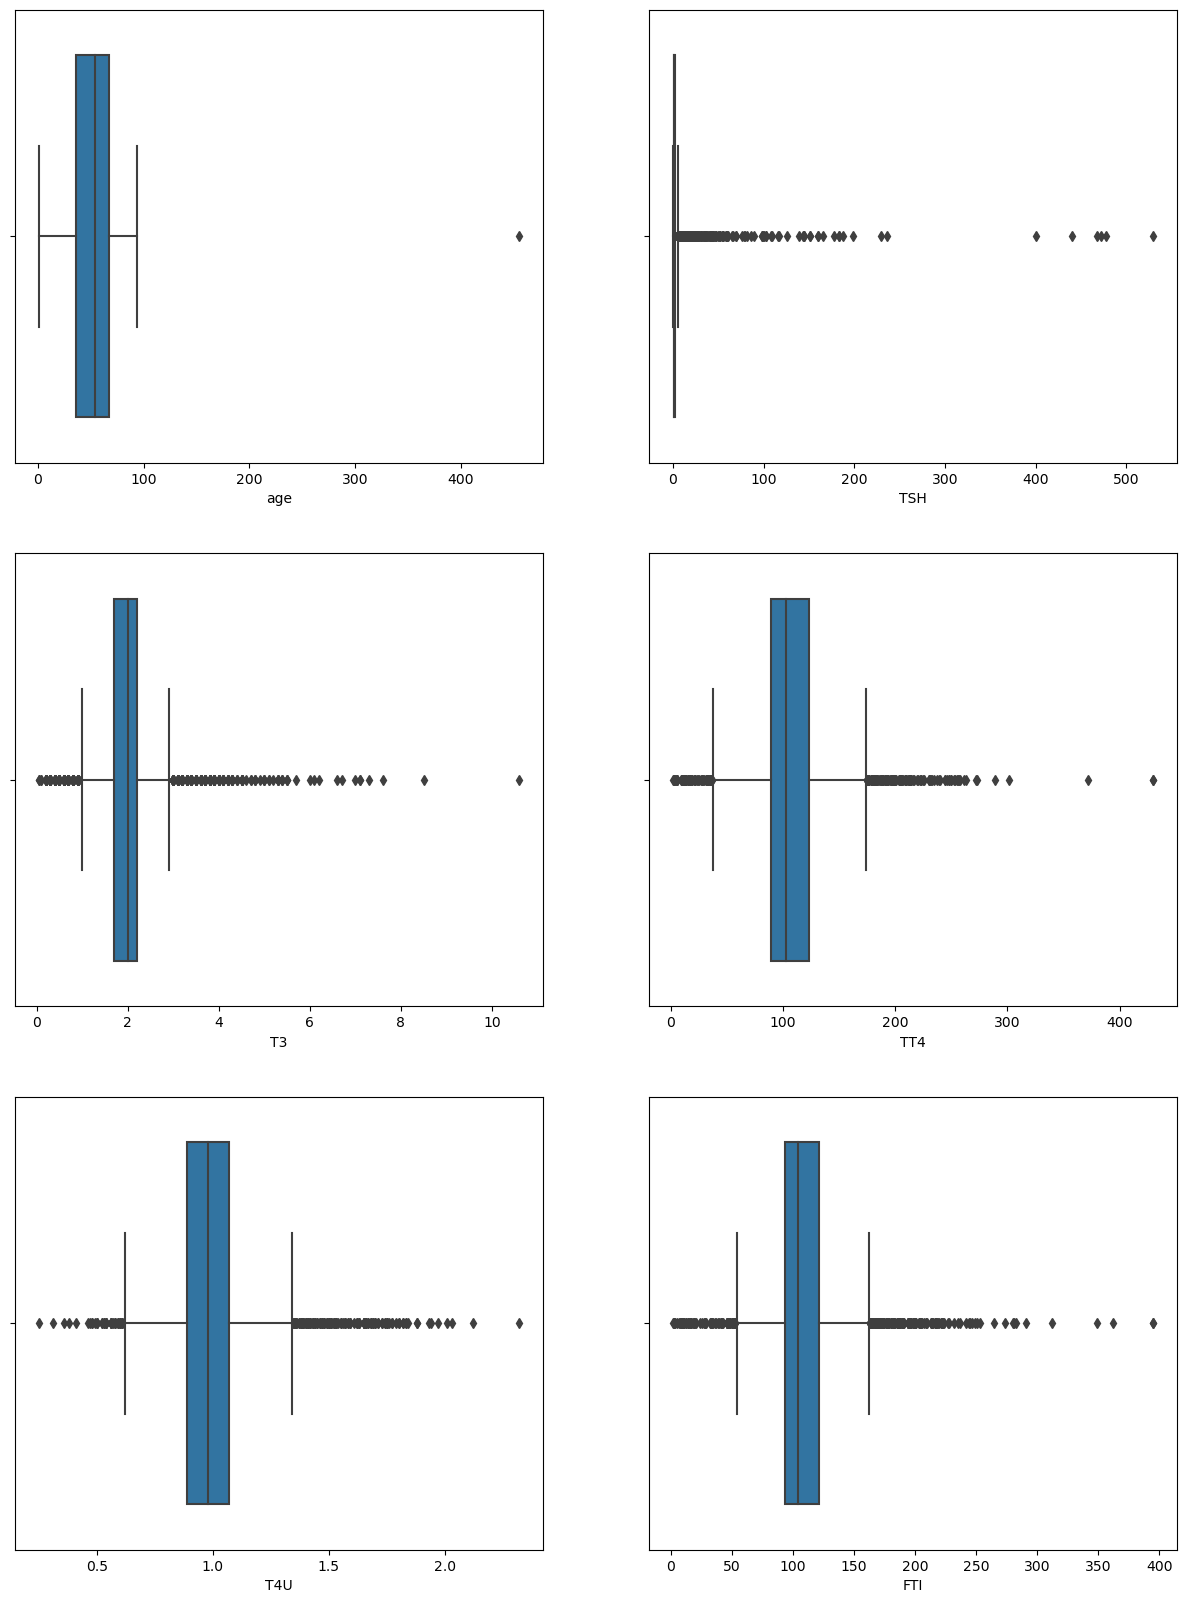

In [20]:
fig, axarr = plt.subplots(3,2,figsize=(15,20))
sns.boxplot(x=data['age'],ax=axarr[0,0])
sns.boxplot(x=data['TSH'],ax=axarr[0,1])
sns.boxplot(x=data['T3'],ax=axarr[1,0])
sns.boxplot(x=data['TT4'],ax=axarr[1,1])
sns.boxplot(x=data['T4U'],ax=axarr[2,0])
sns.boxplot(x=data['FTI'],ax=axarr[2,1])

In [21]:
Q1= data.age.quantile(0.25)
Q2= data.age .quantile(0.50)
Q3= data.age.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.age[(data.age < lowerend) | (data.age>upperend)]
len(data.age[data.age> upperend])

1

In [22]:
data.age= np.where(data.age>upperend ,upperend,data.age)
data.age= np.where(data.age <lowerend ,lowerend,data.age )

In [23]:
Q1= data.T3 .quantile(0.25)
Q2= data.T3 .quantile(0.50)
Q3= data.T3.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.T3[(data.T3 < lowerend) | (data.T3>upperend)]
len(data.T3[data.T3> upperend])

242

In [24]:
data.T3= np.where(data.T3>upperend ,upperend,data.T3)
data.T3= np.where(data.T3 <lowerend ,lowerend,data.T3 )

In [25]:
Q1= data.TSH .quantile(0.25)
Q2= data.TSH .quantile(0.50)
Q3= data.TSH.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.TSH[(data.TSH < lowerend) | (data.TSH>upperend)]
len(data.TSH[data.TSH> upperend])

424

In [26]:
data.TSH= np.where(data.TSH>upperend ,upperend,data.TSH)
data.TSH= np.where(data.TSH <lowerend ,lowerend,data.TSH )

In [27]:
Q1= data.TT4.quantile(0.25)
Q2= data.TT4.quantile(0.50)
Q3= data.TT4.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.TT4[(data.TT4 < lowerend) | (data.TT4>upperend)]
len(data.TT4[data.TT4> upperend])

153

In [28]:
data.TT4= np.where(data.TT4>upperend ,upperend,data.TT4)
data.TT4= np.where(data.TT4 <lowerend ,lowerend,data.TT4 )

In [29]:
Q1= data.T4U .quantile(0.25)
Q2= data.T4U .quantile(0.50)
Q3= data.T4U.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.T4U[(data.T4U < lowerend) | (data.T4U>upperend)]
len(data.T4U[data.T4U> upperend])

164

In [30]:
data.T4U= np.where(data.T4U>upperend ,upperend,data.T4U)
data.T4U= np.where(data.T4U <lowerend ,lowerend,data.T4U )

In [31]:
Q1= data.FTI .quantile(0.25)
Q2= data.FTI .quantile(0.50)
Q3= data.FTI.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.FTI[(data.FTI < lowerend) | (data.FTI>upperend)]
len(data.FTI[data.FTI> upperend])

194

In [32]:
data.FTI= np.where(data.FTI>upperend ,upperend,data.FTI)
data.FTI= np.where(data.FTI <lowerend ,lowerend,data.FTI )

<AxesSubplot:xlabel='FTI'>

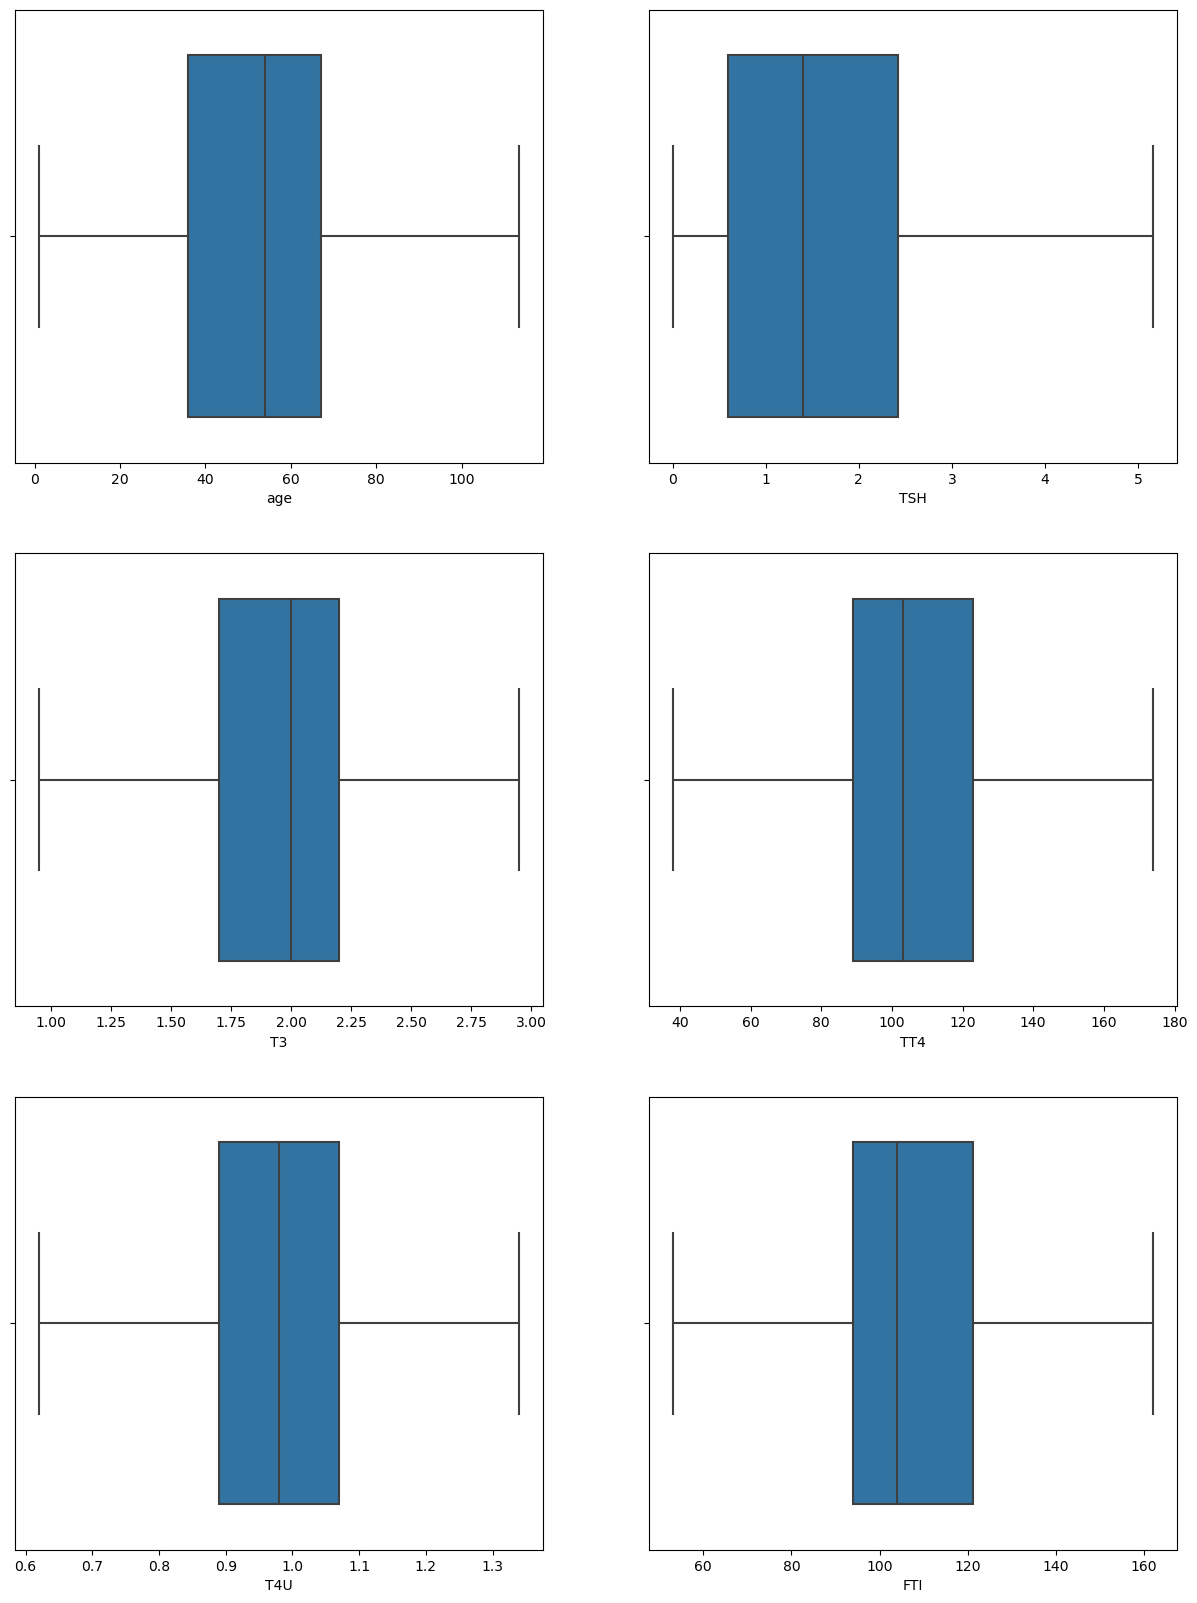

In [33]:
fig, axarr = plt.subplots(3,2,figsize=(15,20))
sns.boxplot(x=data['age'],ax=axarr[0,0])
sns.boxplot(x=data['TSH'],ax=axarr[0,1])
sns.boxplot(x=data['T3'],ax=axarr[1,0])
sns.boxplot(x=data['TT4'],ax=axarr[1,1])
sns.boxplot(x=data['T4U'],ax=axarr[2,0])
sns.boxplot(x=data['FTI'],ax=axarr[2,1])

In [34]:
#statical test for continous data

In [35]:
le=LabelEncoder()
data["binaryClass"]=le.fit_transform(data["binaryClass"])

In [36]:
data_numeric.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [37]:
model = ols('binaryClass ~age',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,0.0011,0.0011,0.0149,0.903
Residual,3770.0,268.5490,0.0712,NaN,NaN


In [38]:
model = ols('binaryClass ~TSH',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
TSH,1.0,98.4322,98.4322,2181.3644,0.0
Residual,3770.0,170.1179,0.0451,NaN,NaN


In [39]:
model = ols('binaryClass ~T3',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
T3,1.0,9.2055,9.2055,133.8164,0.0
Residual,3770.0,259.3446,0.0688,NaN,NaN


In [40]:
model = ols('binaryClass ~TT4',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
TT4,1.0,23.5532,23.5532,362.4355,0.0
Residual,3770.0,244.9969,0.0650,NaN,NaN


In [41]:
model = ols('binaryClass ~T4U',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
T4U,1.0,0.4785,0.4785,6.7298,0.0095
Residual,3770.0,268.0716,0.0711,NaN,NaN


In [42]:
model = ols('binaryClass ~FTI',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
FTI,1.0,26.8020,26.8020,417.9703,0.0
Residual,3770.0,241.7481,0.0641,NaN,NaN


In [43]:
data.drop(["age"],axis=1,inplace=True)

In [44]:
data['binaryClass']=data['binaryClass'].astype("object")

In [45]:
#multicolinearity

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      3772 non-null   object 
 1   onthyroxine              3772 non-null   object 
 2   queryonthyroxine         3772 non-null   object 
 3   onantithyroidmedication  3772 non-null   object 
 4   sick                     3772 non-null   object 
 5   pregnant                 3772 non-null   object 
 6   thyroidsurgery           3772 non-null   object 
 7   I131treatment            3772 non-null   object 
 8   queryhypothyroid         3772 non-null   object 
 9   queryhyperthyroid        3772 non-null   object 
 10  lithium                  3772 non-null   object 
 11  goitre                   3772 non-null   object 
 12  tumor                    3772 non-null   object 
 13  hypopituitary            3772 non-null   object 
 14  psych                   

In [47]:
x=data.iloc[:,[16,18,20,22,24]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [48]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

     feature         VIF
0        TSH    1.238665
1         T3    1.382491
2        TT4   10.630088
3        T4U    4.699283
4        FTI    8.750271
5  intersept  251.085153


In [49]:
data.drop(["TT4"],axis=1,inplace=True)

<AxesSubplot:>

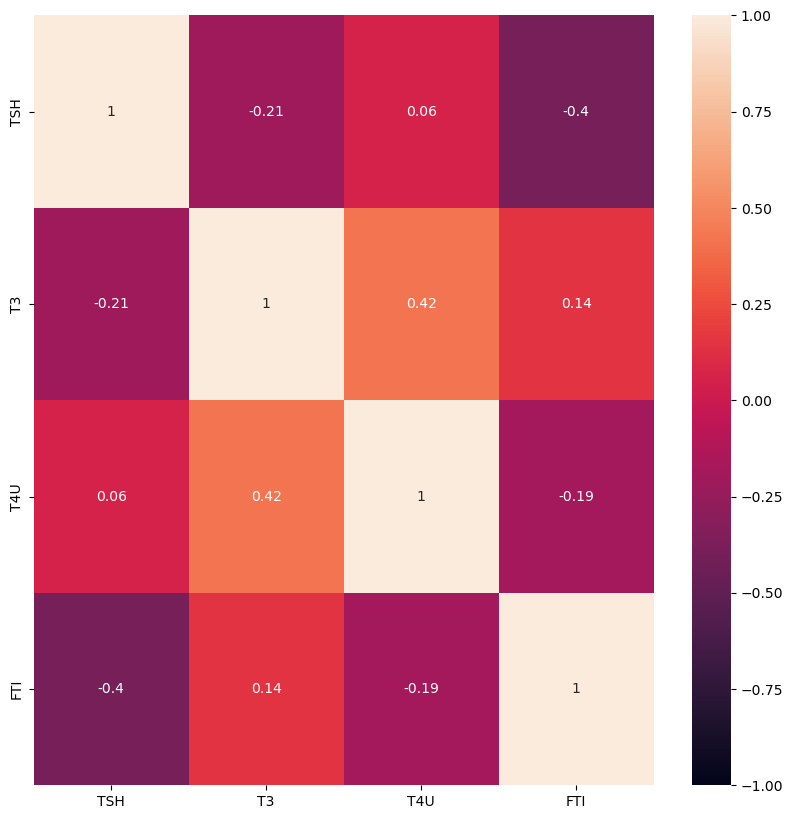

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [51]:
data.cov()

,TSH,T3,T4U,FTI
TSH,2.539745,-0.172877,0.014568,-15.371002
T3,-0.172877,0.257785,0.032576,1.753571
T4U,0.014568,0.032576,0.023270,-0.714854
FTI,-15.371002,1.753571,-0.714854,591.023184


In [52]:
data.corr()

,TSH,T3,T4U,FTI
TSH,1.000000,-0.213655,0.059926,-0.396739
T3,-0.213655,1.000000,0.420606,0.142067
T4U,0.059926,0.420606,1.000000,-0.192760
FTI,-0.396739,0.142067,-0.192760,1.000000


In [53]:
#visulazation for categorical data

In [54]:
data.describe(include=object)

,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,queryhyperthyroid,...,hypopituitary,psych,TSHmeasured,T3measured,TT4measured,T4Umeasured,FTImeasured,TBGmeasured,referralsource,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,1
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


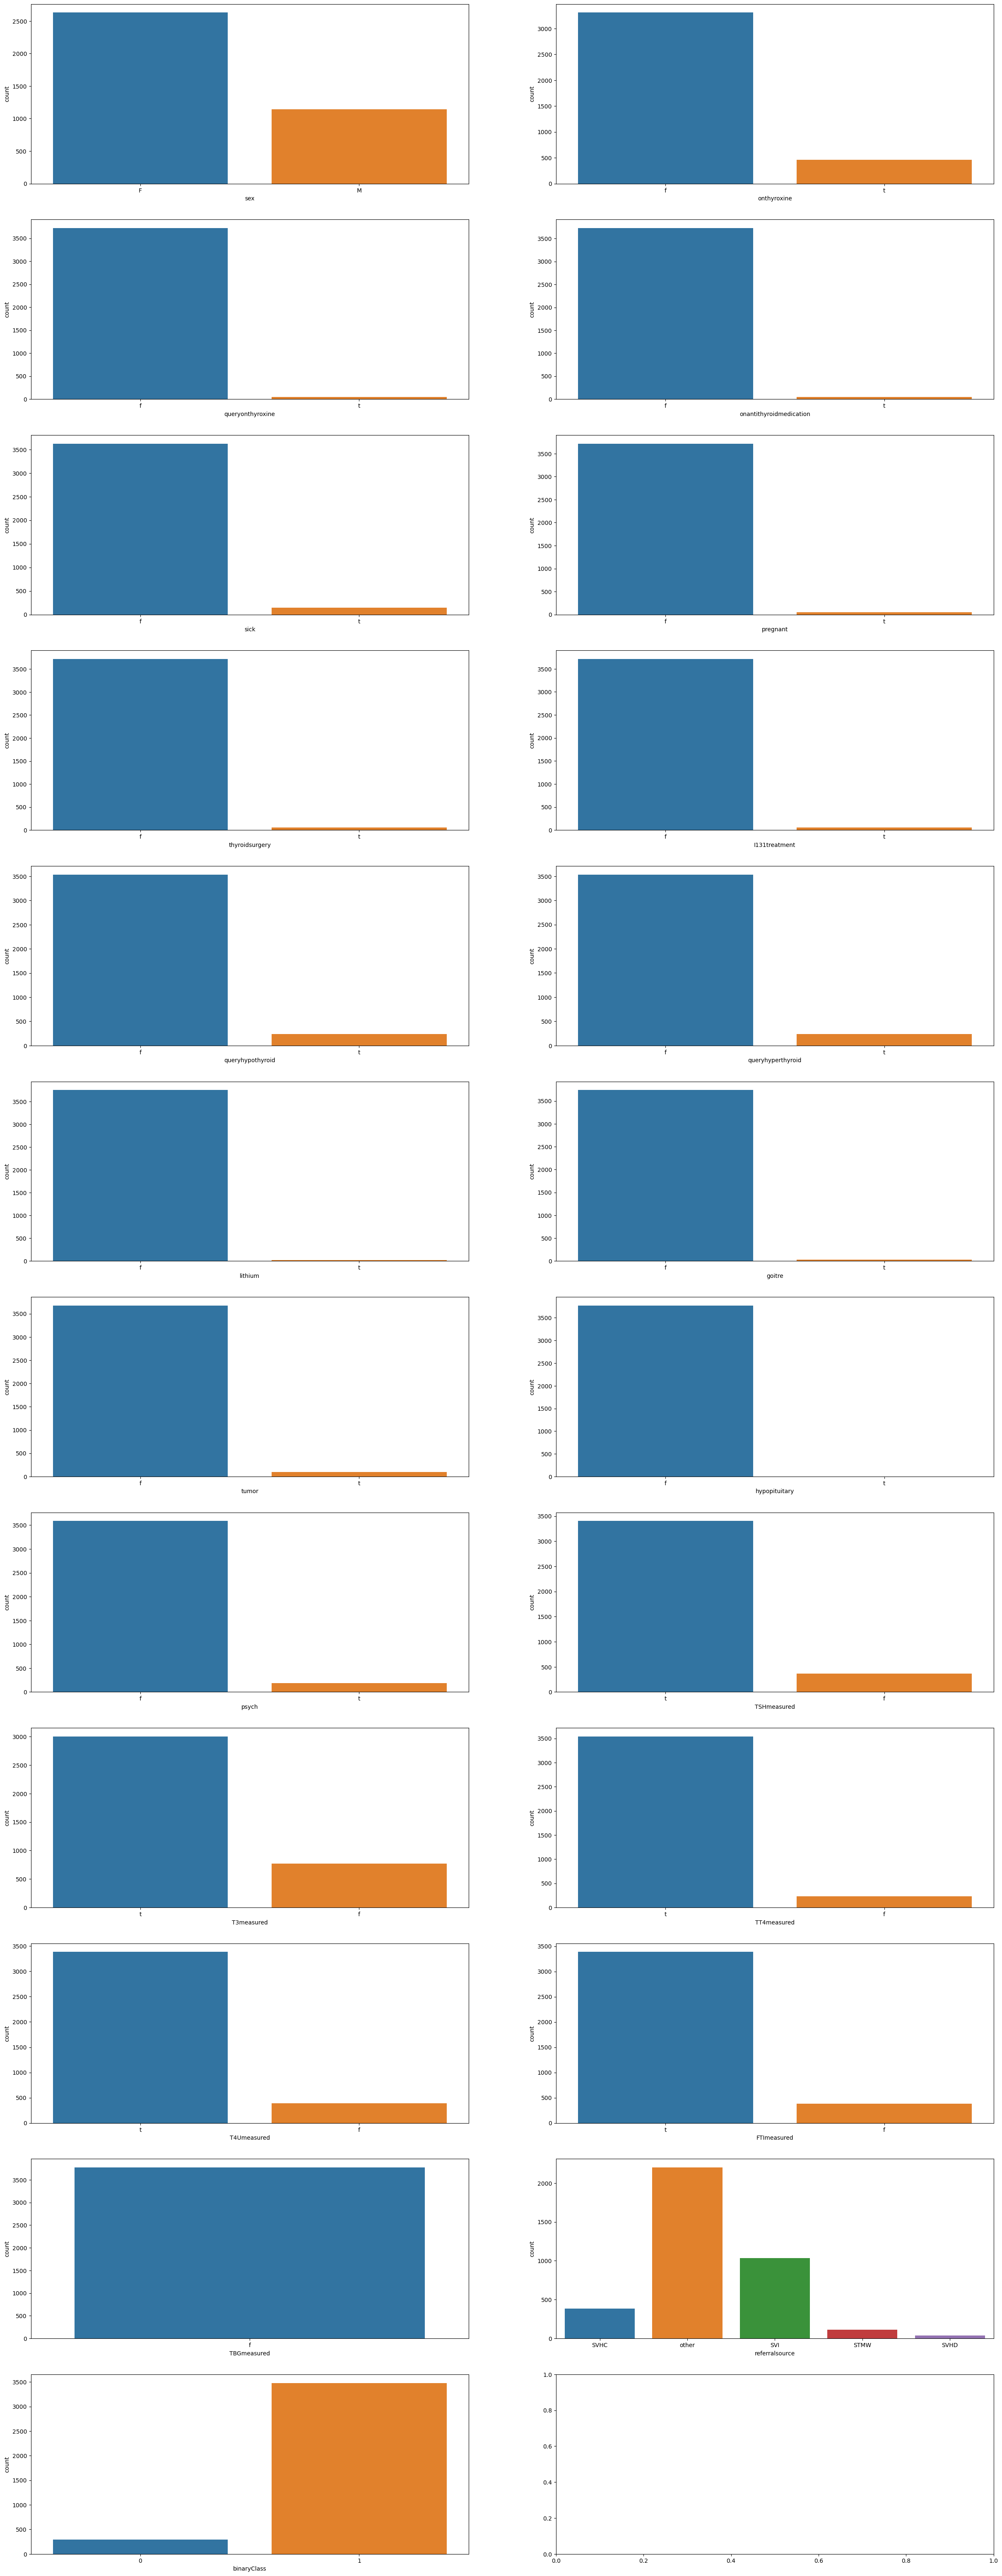

In [55]:
categorical=[]
for column in data:
      if is_string_dtype(data[column]):
        categorical.append(column)      
fig,ax=plt.subplots(nrows=12,ncols=2,figsize=(30,80))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(data[variable],ax=subplot)
    
plt.show()

In [56]:
#statitical test for categorical data

In [57]:
data.describe(include=object)

,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,queryhyperthyroid,...,hypopituitary,psych,TSHmeasured,T3measured,TT4measured,T4Umeasured,FTImeasured,TBGmeasured,referralsource,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,1
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [58]:
le=LabelEncoder()
data["sex"]=le.fit_transform(data["sex"])
data["onthyroxine"]=le.fit_transform(data["onthyroxine"])
data["queryonthyroxine"]=le.fit_transform(data["queryonthyroxine"])
data["onantithyroidmedication"]=le.fit_transform(data["onantithyroidmedication"])
data["sick"]=le.fit_transform(data["sick"])
data["pregnant"]=le.fit_transform(data["pregnant"])
data["thyroidsurgery"]=le.fit_transform(data["thyroidsurgery"])
data["I131treatment"]=le.fit_transform(data["I131treatment"])
data["queryhypothyroid"]=le.fit_transform(data["queryhypothyroid"])
data["hypopituitary"]=le.fit_transform(data["hypopituitary"])
data["psych"]=le.fit_transform(data["psych"])
data["TSHmeasured"]=le.fit_transform(data["TSHmeasured"])
data["T3measured"]=le.fit_transform(data["T3measured"])
data["TT4measured"]=le.fit_transform(data["TT4measured"])
data["T4Umeasured"]=le.fit_transform(data["T4Umeasured"])
data["FTImeasured"]=le.fit_transform(data["FTImeasured"])
data["TBGmeasured"]=le.fit_transform(data["TBGmeasured"])
data["queryhyperthyroid"]=le.fit_transform(data["queryhyperthyroid"])
data["lithium"]=le.fit_transform(data["lithium"])
data["goitre"]=le.fit_transform(data["goitre"])
data["tumor"]=le.fit_transform(data["tumor"])
data["referralsource"]=le.fit_transform(data["referralsource"])
data["binaryClass"]=le.fit_transform(data["binaryClass"])

In [59]:
sex=pd.crosstab(data.binaryClass ,data.sex , margins = True)
scipy.stats.chi2_contingency(sex ,correction= False )

(9.414729917972014,
 0.05152915473580807,
 4,
 array([[ 202.89766702,   88.10233298,  291.        ],
        [2427.10233298, 1053.89766702, 3481.        ],
        [2630.        , 1142.        , 3772.        ]]))

In [60]:
onthyroxine=pd.crosstab(data.binaryClass ,data.onthyroxine , margins = True)
scipy.stats.chi2_contingency(onthyroxine ,correction= False )

(24.78490644014187,
 5.55758466257417e-05,
 4,
 array([[ 255.20360551,   35.79639449,  291.        ],
        [3052.79639449,  428.20360551, 3481.        ],
        [3308.        ,  464.        , 3772.        ]]))

In [61]:
queryonthyroxine=pd.crosstab(data.binaryClass ,data.queryonthyroxine , margins = True)
scipy.stats.chi2_contingency(queryonthyroxine ,correction= False )

(0.20927065316276935,
 0.9948930179285833,
 4,
 array([[ 287.1426299,    3.8573701,  291.       ],
        [3434.8573701,   46.1426299, 3481.       ],
        [3722.       ,   50.       , 3772.       ]]))

In [62]:
onantithyroidmedication=pd.crosstab(data.binaryClass ,data.onantithyroidmedication , margins = True)
scipy.stats.chi2_contingency(onantithyroidmedication ,correction= False )

(1.774336854566088,
 0.7771740833309226,
 4,
 array([[2.87682662e+02, 3.31733828e+00, 2.91000000e+02],
        [3.44131734e+03, 3.96826617e+01, 3.48100000e+03],
        [3.72900000e+03, 4.30000000e+01, 3.77200000e+03]]))

In [63]:
sick=pd.crosstab(data.binaryClass ,data.sick , margins = True)
scipy.stats.chi2_contingency(sick ,correction= False )

(0.011538665444597326,
 0.9999834212728257,
 4,
 array([[ 279.65933192,   11.34066808,  291.        ],
        [3345.34066808,  135.65933192, 3481.        ],
        [3625.        ,  147.        , 3772.        ]]))

In [64]:
pregnant=pd.crosstab(data.binaryClass ,data.pregnant, margins = True)
scipy.stats.chi2_contingency(pregnant,correction= False )

(4.493764830537442,
 0.34328744999493227,
 4,
 array([[ 286.9111877,    4.0888123,  291.       ],
        [3432.0888123,   48.9111877, 3481.       ],
        [3719.       ,   53.       , 3772.       ]]))

In [65]:
thyroidsurgery=pd.crosstab(data.binaryClass ,data.thyroidsurgery, margins = True)
scipy.stats.chi2_contingency(thyroidsurgery,correction= False )

(1.172775338192067,
 0.8825603177481023,
 4,
 array([[ 286.9111877,    4.0888123,  291.       ],
        [3432.0888123,   48.9111877, 3481.       ],
        [3719.       ,   53.       , 3772.       ]]))

In [66]:
I131treatment=pd.crosstab(data.binaryClass ,data.I131treatment, margins = True)
scipy.stats.chi2_contingency(I131treatment,correction= False )

(0.048605445281868484,
 0.9997094300898125,
 4,
 array([[ 286.44830329,    4.55169671,  291.        ],
        [3426.55169671,   54.44830329, 3481.        ],
        [3713.        ,   59.        , 3772.        ]]))

In [67]:
queryhypothyroid=pd.crosstab(data.binaryClass ,data.queryhypothyroid, margins = True)
scipy.stats.chi2_contingency(queryhypothyroid,correction= False )

(28.080774496727642,
 1.2011474193008797e-05,
 4,
 array([[ 272.94750795,   18.05249205,  291.        ],
        [3265.05249205,  215.94750795, 3481.        ],
        [3538.        ,  234.        , 3772.        ]]))

In [68]:
hypopituitary=pd.crosstab(data.binaryClass ,data.hypopituitary, margins = True)
scipy.stats.chi2_contingency(hypopituitary,correction= False )

(0.08361883592645333,
 0.9991499698928847,
 4,
 array([[2.90922853e+02, 7.71474019e-02, 2.91000000e+02],
        [3.48007715e+03, 9.22852598e-01, 3.48100000e+03],
        [3.77100000e+03, 1.00000000e+00, 3.77200000e+03]]))

In [69]:
psych=pd.crosstab(data.binaryClass ,data.psych, margins = True)
scipy.stats.chi2_contingency(psych,correction= False )

(3.0799772054121863,
 0.5445317604132515,
 4,
 array([[ 276.80487805,   14.19512195,  291.        ],
        [3311.19512195,  169.80487805, 3481.        ],
        [3588.        ,  184.        , 3772.        ]]))

In [70]:
TSHmeasured=pd.crosstab(data.binaryClass ,data.TSHmeasured, margins = True)
scipy.stats.chi2_contingency(TSHmeasured,correction= False )

(34.19204424708313,
 6.805735205990021e-07,
 4,
 array([[  28.4673913,  262.5326087,  291.       ],
        [ 340.5326087, 3140.4673913, 3481.       ],
        [ 369.       , 3403.       , 3772.       ]]))

In [71]:
T3measured=pd.crosstab(data.binaryClass ,data.T3measured, margins = True)
scipy.stats.chi2_contingency(T3measured,correction= False )

(4.07435562605084,
 0.39603642890655005,
 4,
 array([[  59.32635207,  231.67364793,  291.        ],
        [ 709.67364793, 2771.32635207, 3481.        ],
        [ 769.        , 3003.        , 3772.        ]]))

In [72]:
TT4measured=pd.crosstab(data.binaryClass ,data.TT4measured, margins = True)
scipy.stats.chi2_contingency(TT4measured,correction= False )

(10.647001376945655,
 0.030831211945707326,
 4,
 array([[  17.82104984,  273.17895016,  291.        ],
        [ 213.17895016, 3267.82104984, 3481.        ],
        [ 231.        , 3541.        , 3772.        ]]))

In [73]:
T4Umeasured=pd.crosstab(data.binaryClass ,data.T4Umeasured, margins = True)
scipy.stats.chi2_contingency(T4Umeasured,correction= False )

(0.953704264490495,
 0.916732787946529,
 4,
 array([[  29.85604454,  261.14395546,  291.        ],
        [ 357.14395546, 3123.85604454, 3481.        ],
        [ 387.        , 3385.        , 3772.        ]]))

In [74]:
FTImeasured=pd.crosstab(data.binaryClass ,data.FTImeasured, margins = True)
scipy.stats.chi2_contingency(FTImeasured,correction= False )

(0.8981753487082761,
 0.9248224498096999,
 4,
 array([[  29.70174973,  261.29825027,  291.        ],
        [ 355.29825027, 3125.70174973, 3481.        ],
        [ 385.        , 3387.        , 3772.        ]]))

In [75]:
TBGmeasured=pd.crosstab(data.binaryClass ,data.TBGmeasured, margins = True)
scipy.stats.chi2_contingency(TBGmeasured,correction= False )

(0.0,
 1.0,
 2,
 array([[ 291.,  291.],
        [3481., 3481.],
        [3772., 3772.]]))

In [76]:
referralsource=pd.crosstab(data.binaryClass ,data.referralsource, margins = True)
scipy.stats.chi2_contingency(referralsource,correction= False )

(17.267479805361095,
 0.06865092435138533,
 10,
 array([[8.64050901e+00, 2.97788971e+01, 3.00874867e+00, 7.97704136e+01,
         1.69801432e+02, 2.91000000e+02],
        [1.03359491e+02, 3.56221103e+02, 3.59912513e+01, 9.54229586e+02,
         2.03119857e+03, 3.48100000e+03],
        [1.12000000e+02, 3.86000000e+02, 3.90000000e+01, 1.03400000e+03,
         2.20100000e+03, 3.77200000e+03]]))

In [77]:
data.drop(["queryonthyroxine",'referralsource','onantithyroidmedication','sick','pregnant','thyroidsurgery','I131treatment',
           'hypopituitary','psych','T3measured','T4Umeasured','FTImeasured','TBGmeasured'],axis=1,inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                3772 non-null   int32  
 1   onthyroxine        3772 non-null   int32  
 2   queryhypothyroid   3772 non-null   int32  
 3   queryhyperthyroid  3772 non-null   int32  
 4   lithium            3772 non-null   int32  
 5   goitre             3772 non-null   int32  
 6   tumor              3772 non-null   int32  
 7   TSHmeasured        3772 non-null   int32  
 8   TSH                3772 non-null   float64
 9   T3                 3772 non-null   float64
 10  TT4measured        3772 non-null   int32  
 11  T4U                3772 non-null   float64
 12  FTI                3772 non-null   float64
 13  binaryClass        3772 non-null   int32  
dtypes: float64(4), int32(10)
memory usage: 265.3 KB


# Logistic regression

In [79]:
data.columns

Index(['sex', 'onthyroxine', 'queryhypothyroid', 'queryhyperthyroid',
       'lithium', 'goitre', 'tumor', 'TSHmeasured', 'TSH', 'T3', 'TT4measured',
       'T4U', 'FTI', 'binaryClass'],
      dtype='object')

In [80]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [81]:
model=LogisticRegression(class_weight=None,random_state=None,solver='lbfgs',max_iter=100)
model1=model.fit(x,y)

In [82]:
model1.intercept_

array([5.50458094])

In [83]:
model1.coef_

array([[ 0.28786694,  2.51223567, -0.10286636, -0.18824111,  0.27256449,
         0.19755068, -0.5094532 ,  2.7120188 , -3.1724454 ,  0.62906921,
         2.19977559,  0.76316374,  0.03546134]])

In [84]:
y_pred=model1.predict(x)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [85]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[ 254,   37],
       [  70, 3411]], dtype=int64)

In [86]:
accuracy_score_lr=model1.score(x,y)
accuracy_score_lr

0.9716330858960763

In [87]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       291
           1       0.99      0.98      0.98      3481

    accuracy                           0.97      3772
   macro avg       0.89      0.93      0.91      3772
weighted avg       0.97      0.97      0.97      3772



In [88]:
# roc curve
y_pred_prob=model1.predict_proba(x)
fpr1,tpr1,threshold=roc_curve(y,y_pred_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print(roc_auc1)

0.9887282064343401


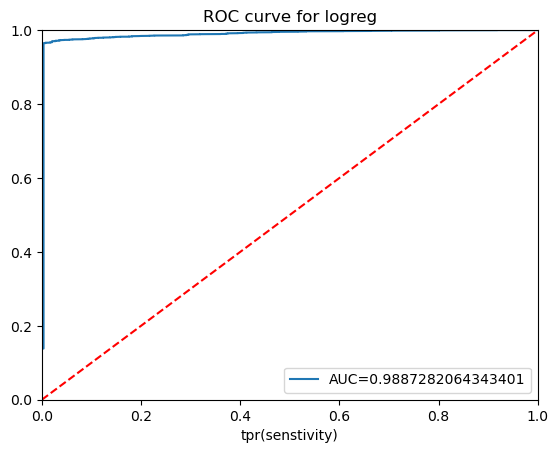

In [89]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr1,tpr1,label="AUC="+str(roc_auc1))
plt.legend(loc=4)
plt.show()

In [90]:
#evuality  test train method

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [92]:
model2=LogisticRegression(class_weight=None,random_state=None,solver='lbfgs',max_iter=100)
model2.fit(x_train,y_train)

LogisticRegression()

In [93]:
model2.intercept_

array([7.90565602])

In [94]:
model2.coef_

array([[-0.10651407,  2.52961009, -0.01935922, -0.19228451,  0.4866605 ,
         0.22890728, -0.80849914,  2.45549203, -3.22067675,  0.5609668 ,
         1.37274108, -0.17246134,  0.03590217]])

In [95]:
y_pred=model2.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [96]:
accuracy_score_Test_Train=model2.score(x_train,y_train)
accuracy_score_Test_Train

0.9724892277096453

In [97]:
accuracy_score_Test_Train=model2.score(x_test,y_test)
accuracy_score_Test_Train

0.9721854304635762

In [98]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,53,5,58
1,16,681,697
All,69,686,755


In [99]:
confusion_matrix(y_test,y_pred)

array([[ 53,   5],
       [ 16, 681]], dtype=int64)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        58
           1       0.99      0.98      0.98       697

    accuracy                           0.97       755
   macro avg       0.88      0.95      0.91       755
weighted avg       0.98      0.97      0.97       755



In [101]:
# roc curve
y_pred_prob=model2.predict_proba(x)
fpr2,tpr2,threshold=roc_curve(y,y_pred_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print(roc_auc2)

0.988617640583985


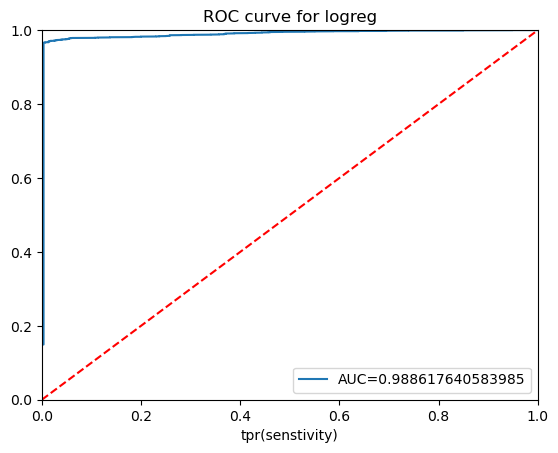

In [102]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr2,tpr2,label="AUC="+str(roc_auc2))
plt.legend(loc=4)
plt.show()

In [103]:
# DECISION TREE 

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [105]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [106]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.20, random_state = 1)

In [107]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3017, 13) (755, 13) (3017,) (755,)


In [108]:
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",random_state=40)

In [109]:
model3=clf.fit(x_train,y_train)

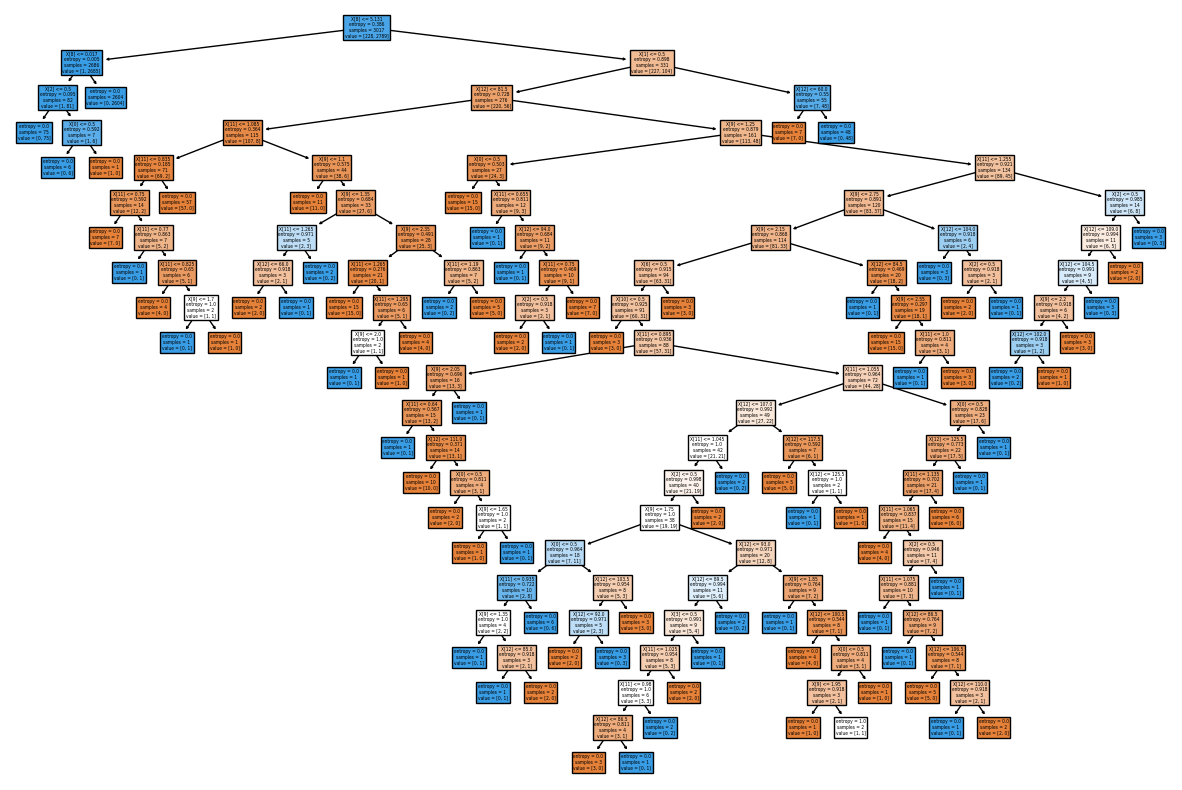

In [110]:
plt.figure(figsize=(15,10))
a = plot_tree(model3,filled=True)
plt.show()

In [111]:
model3.get_depth()

21

In [112]:
print(model3.feature_importances_)

[0.01225618 0.05683414 0.01335    0.00110355 0.         0.
 0.00151828 0.         0.73961148 0.03331853 0.00158169 0.05105186
 0.08937428]


In [113]:
depth = [1,2,3,4,5,10,15,20,25]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

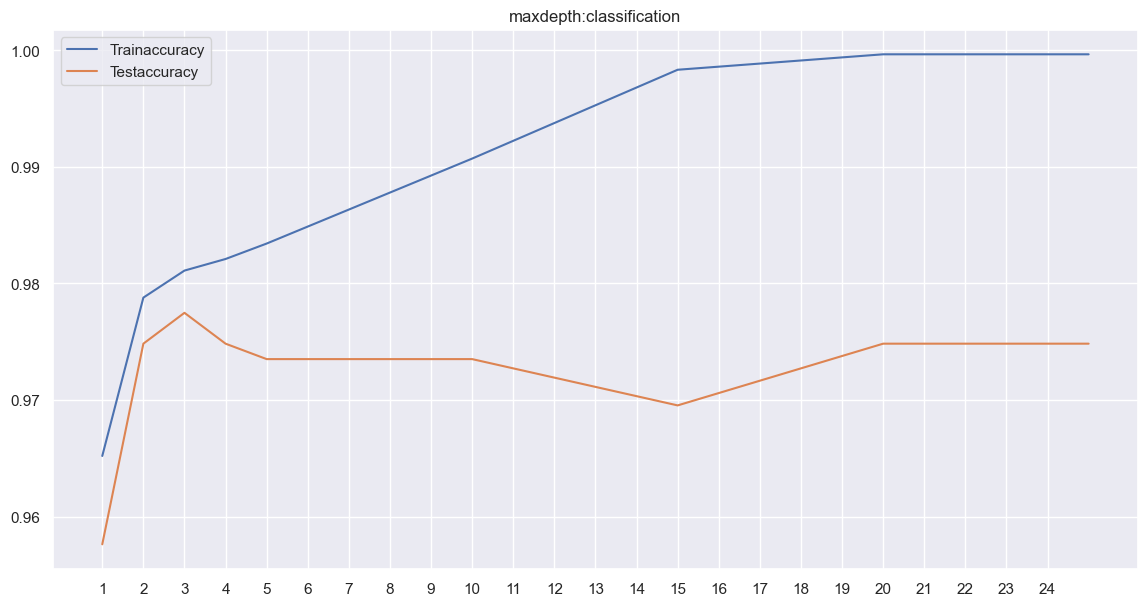

In [114]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,25,1))
plt.show()

In [115]:
model11= DecisionTreeClassifier(max_depth=3, random_state=50)    
model11.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [116]:
y_train_pred2=model11.predict(x_train)
y_train

231     1
314     1
3567    1
340     1
3204    1
       ..
2763    1
905     1
1096    1
235     1
1061    1
Name: binaryClass, Length: 3017, dtype: int32

In [117]:
y_test_pred2=model11.predict(x_test)
y_test_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [118]:
accuracytrain=(accuracy_score(y_train, y_train_pred2))
accuracytrain

0.9811070599933709

In [119]:
accuracy_score_dt=(accuracy_score(y_test, y_test_pred2))
accuracy_score_dt

0.9774834437086093

In [120]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        63
           1       1.00      0.98      0.99       692

    accuracy                           0.98       755
   macro avg       0.90      0.98      0.93       755
weighted avg       0.98      0.98      0.98       755



In [121]:
# roc curve
y_pred_prob=model3.predict_proba(x_test)
fpr3,tpr3,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.9421047802550693


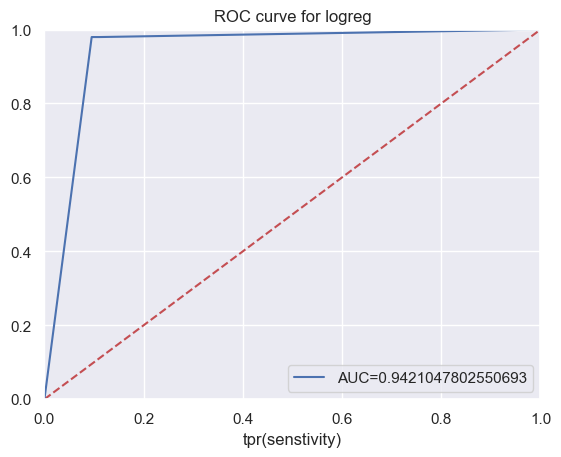

In [122]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

In [123]:
#Randoam forest

In [124]:
model4= RandomForestClassifier(n_estimators =100, max_depth = 3, random_state = 0 )
model4

RandomForestClassifier(max_depth=3, random_state=0)

In [125]:
model4.fit(x_train,y_train)
model4

RandomForestClassifier(max_depth=3, random_state=0)

In [126]:
y_pred= model4.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [127]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,26,37,63
1,1,691,692
All,27,728,755


In [128]:
confusion_matrix(y_test,y_pred)

array([[ 26,  37],
       [  1, 691]], dtype=int64)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.41      0.58        63
           1       0.95      1.00      0.97       692

    accuracy                           0.95       755
   macro avg       0.96      0.71      0.78       755
weighted avg       0.95      0.95      0.94       755



In [130]:
accuracy_score_rf=(accuracy_score(y_test, y_pred))
accuracy_score_rf

0.9496688741721855

In [131]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.9937264886686853


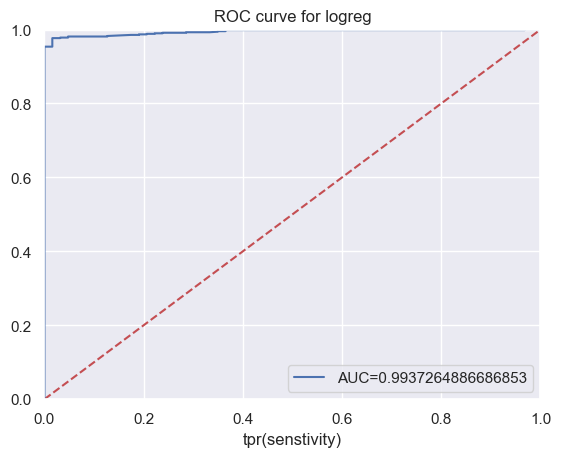

In [132]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

In [133]:
#randoam forest  using grid search

In [134]:
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}

In [135]:
rfc= RandomForestClassifier(random_state = 1)
rfc

RandomForestClassifier(random_state=1)

In [136]:
g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [137]:
model5= g_search.fit(x_train,y_train)

In [138]:
print(model5.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 150}


In [139]:
y_pred= model5.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [140]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,59,4,63
1,13,679,692
All,72,683,755


In [141]:
confusion_matrix(y_test,y_pred)

array([[ 59,   4],
       [ 13, 679]], dtype=int64)

In [142]:
accuracy_score_rfgs=(accuracy_score(y_test, y_pred))
accuracy_score_rfgs

0.9774834437086093

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        63
           1       0.99      0.98      0.99       692

    accuracy                           0.98       755
   macro avg       0.91      0.96      0.93       755
weighted avg       0.98      0.98      0.98       755



In [144]:
# roc curve
y_pred_prob=model5.predict_proba(x_test)
fpr5,tpr5,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.9942769978897147


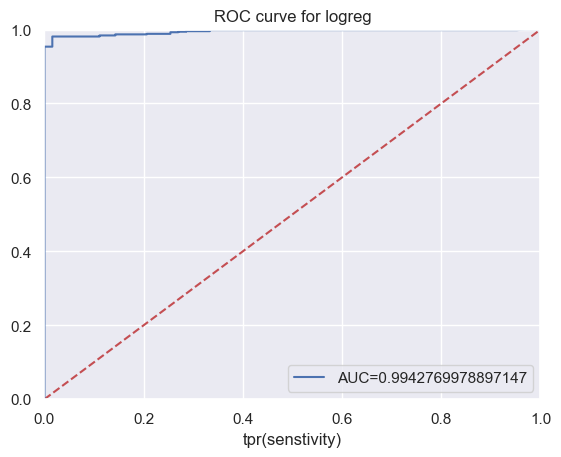

In [145]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

In [146]:
#random forest using Randomized serch

In [147]:
rfr= RandomizedSearchCV(estimator = rfc,
                                param_distributions = param_grid,
                                n_iter = 20, cv= 3, random_state =421)

In [148]:
model6= rfr.fit(x_train,y_train)

In [149]:
print(model6.best_params_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 7}


In [150]:
y_pred= model6.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [151]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,61,2,63
1,14,678,692
All,75,680,755


In [152]:
confusion_matrix(y_test,y_pred)

array([[ 61,   2],
       [ 14, 678]], dtype=int64)

In [153]:
accuracy_score_rfrs=accuracy_score(y_test, y_pred)
accuracy_score_rfrs

0.9788079470198675

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        63
           1       1.00      0.98      0.99       692

    accuracy                           0.98       755
   macro avg       0.91      0.97      0.94       755
weighted avg       0.98      0.98      0.98       755



In [155]:
# roc curve
y_pred_prob=model6.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

0.994988072300211


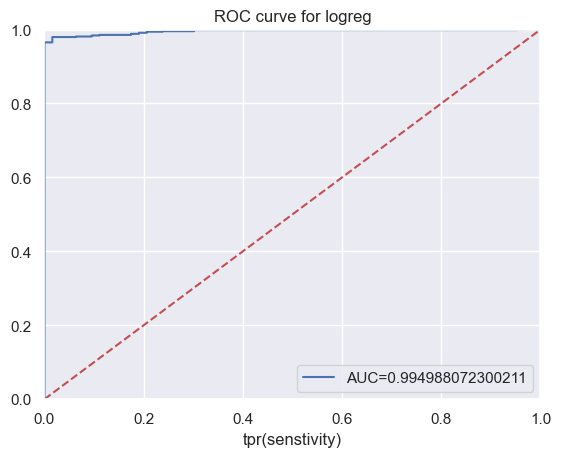

In [156]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()

In [157]:
#gradient Boosting classifier

In [158]:
model7= GradientBoostingClassifier(max_depth=4,n_estimators =50,learning_rate=1.0,random_state=0)
model7

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [159]:
model7= model7.fit(x_train,y_train)
model7

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [160]:
y_predGB=model7.predict(x_test)
print(y_predGB)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 

In [161]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,62,1,63
1,18,674,692
All,80,675,755


In [162]:
confusion_matrix(y_test,y_pred)

array([[ 61,   2],
       [ 14, 678]], dtype=int64)

In [163]:
accuracy_score_gb=(accuracy_score(y_test,y_predGB))
accuracy_score_gb

0.9748344370860927

In [164]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        63
           1       1.00      0.97      0.99       692

    accuracy                           0.97       755
   macro avg       0.89      0.98      0.93       755
weighted avg       0.98      0.97      0.98       755



In [165]:
# roc curve
y_pred_prob=model7.predict_proba(x_test)
fpr7,tpr7,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc7=auc(fpr7,tpr7)
print(roc_auc7)

0.9814432516744656


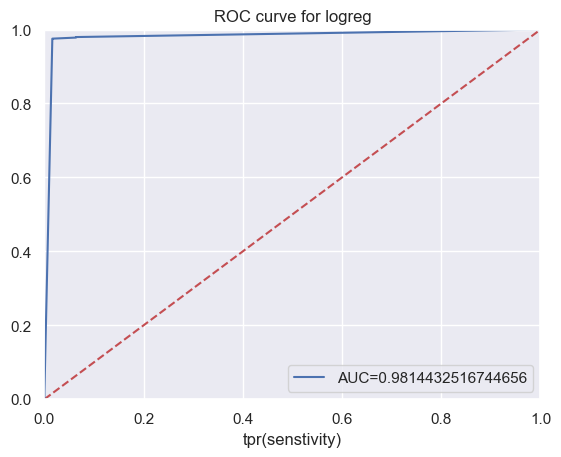

In [166]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr7,tpr7,label="AUC="+str(roc_auc7))
plt.legend(loc=4)
plt.show()

In [167]:
#Adaptive boosting

In [168]:
model8= AdaBoostClassifier(n_estimators =50,algorithm='SAMME.R',learning_rate=1.0,random_state=0 )
model8

AdaBoostClassifier(random_state=0)

In [169]:
model8= model8.fit(x_train,y_train)
model8

AdaBoostClassifier(random_state=0)

In [170]:
y_predab=model8.predict(x_test)
print(y_predab)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 

In [171]:
pd.crosstab(y_test,y_predab,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,56,7,63
1,10,682,692
All,66,689,755


In [172]:
confusion_matrix(y_test,y_pred)

array([[ 61,   2],
       [ 14, 678]], dtype=int64)

In [173]:
accuracy_score_ab=(accuracy_score(y_test, y_predab))
accuracy_score_ab

0.9774834437086093

In [174]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        63
           1       1.00      0.97      0.99       692

    accuracy                           0.97       755
   macro avg       0.89      0.98      0.93       755
weighted avg       0.98      0.97      0.98       755



In [175]:
# roc curve
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.980376640058721


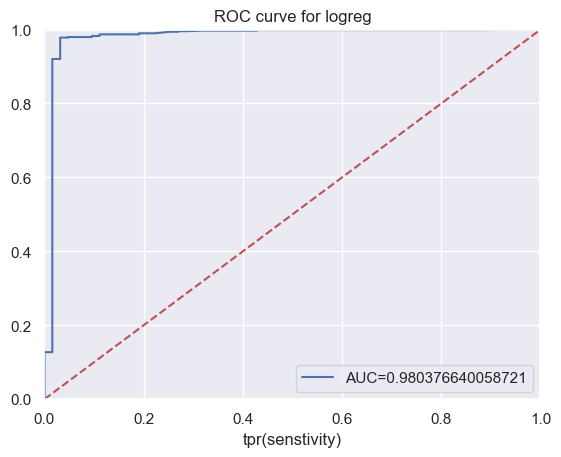

In [176]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

In [177]:
#Bagging

In [178]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0,
                        max_features=1.0, bootstrap=True, bootstrap_features=False,
                        oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [179]:
model9=model.fit(x_train,y_train)

In [180]:
y_pred=model9.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [181]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
binaryClass,,,
0,57,6,63
1,12,680,692
All,69,686,755


In [182]:
accuracy_score_bag=accuracy_score(y_test,y_pred)
accuracy_score_bag

0.976158940397351

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        63
           1       0.99      0.98      0.99       692

    accuracy                           0.98       755
   macro avg       0.91      0.94      0.93       755
weighted avg       0.98      0.98      0.98       755



In [184]:
# roc curve
y_pred_prob=model9.predict_proba(x_test)
fpr9,tpr9,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc9=auc(fpr9,tpr9)
print(roc_auc9)

0.9858473254427012


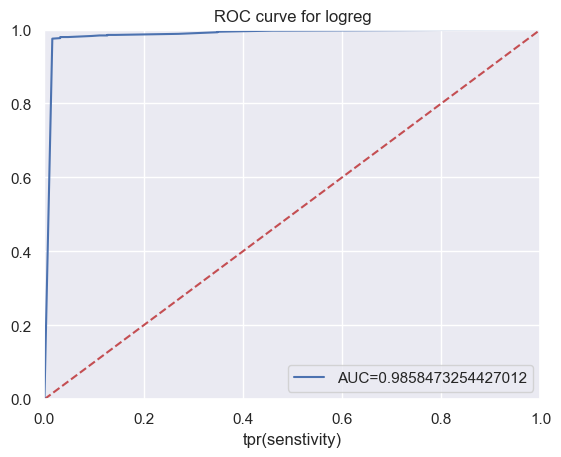

In [185]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr9,tpr9,label="AUC="+str(roc_auc9))
plt.legend(loc=4)
plt.show()

In [186]:
#Knn neighbour

In [187]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [188]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [189]:
#model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='brute',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [190]:
model10=model.fit(x_train,y_train)

In [191]:
y_pred=model10.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [192]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
binaryClass,,,
0,49,14,63
1,20,672,692
All,69,686,755


In [193]:
accuracy_score_knn=accuracy_score(y_test,y_pred)
accuracy_score_knn

0.9549668874172186

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        63
           1       0.98      0.97      0.98       692

    accuracy                           0.95       755
   macro avg       0.84      0.87      0.86       755
weighted avg       0.96      0.95      0.96       755



In [195]:
# roc curve
y_pred_prob=model10.predict_proba(x_test)
fpr10,tpr10,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc10=auc(fpr10,tpr10)
print(roc_auc10)

0.9655243600330305


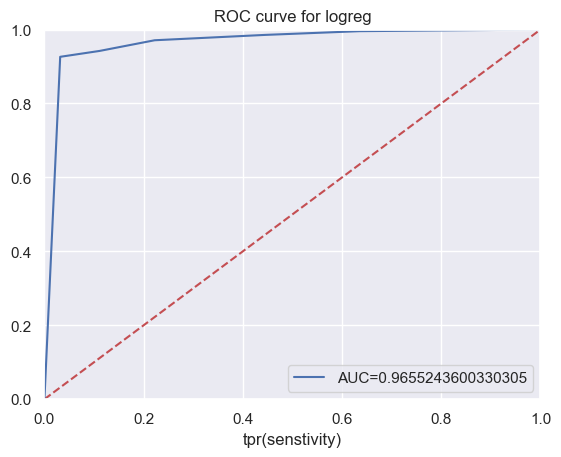

In [196]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr10,tpr10,label="AUC="+str(roc_auc10))
plt.legend(loc=4)
plt.show()

In [197]:
#naive Bayes classifier

In [198]:
model11=GaussianNB()

In [199]:
model11=model11.fit(x_train,y_train)

In [200]:
y_pred=model11.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [201]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
binaryClass,,,
0,61,2,63
1,81,611,692
All,142,613,755


In [202]:
confusion_matrix(y_test,y_pred)

array([[ 61,   2],
       [ 81, 611]], dtype=int64)

In [203]:
accuracy_score_nbc=accuracy_score(y_test,y_pred)
accuracy_score_nbc

0.8900662251655629

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.97      0.60        63
           1       1.00      0.88      0.94       692

    accuracy                           0.89       755
   macro avg       0.71      0.93      0.77       755
weighted avg       0.95      0.89      0.91       755



In [205]:
# roc curve
y_pred_prob=model11.predict_proba(x_test)
fpr11,tpr11,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc11=auc(fpr11,tpr11)
print(roc_auc11)

0.977085053674649


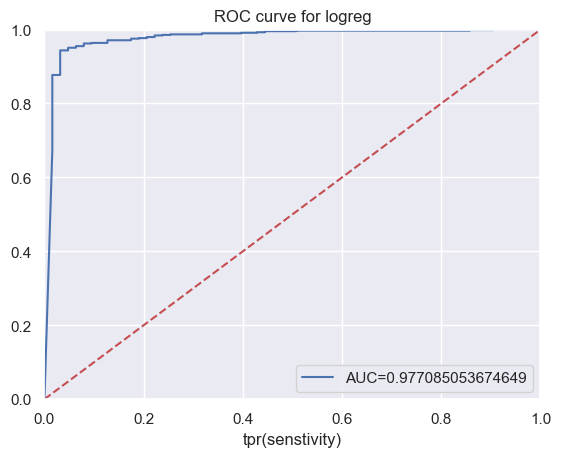

In [206]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr11,tpr11,label="AUC="+str(roc_auc11))
plt.legend(loc=4)
plt.show()

In [207]:
print('Accuracy for Logistic regression method:',accuracy_score_lr*100)
print('Accuracy for TestTrain-Logistic regression method:',accuracy_score_Test_Train*100)
print('Accuracy for Decision_tree method:', accuracy_score_dt*100)
print('Accuracy for Random forest method:', accuracy_score_rf*100)
print('Accuracy for Random forest_Gridsearch method:',accuracy_score_rfgs*100)
print('Accuracy for Random forest_Randomsearch:',accuracy_score_rfrs*100)
print('Accuracy for Gradient_boosting_classifier:',accuracy_score_gb*100)
print('Accuracy for Naive_Bayes_classifier:', accuracy_score_nbc*100)
print('Accuracy for Adaptive_boosting_classifier:',accuracy_score_ab*100)
print('Accuracy for bagging_classifier:',accuracy_score_bag*100)
print('Accuracy forKnn_neighbour_classifier :',accuracy_score_knn*100)

Accuracy for Logistic regression method: 97.16330858960764
Accuracy for TestTrain-Logistic regression method: 97.21854304635762
Accuracy for Decision_tree method: 97.74834437086093
Accuracy for Random forest method: 94.96688741721854
Accuracy for Random forest_Gridsearch method: 97.74834437086093
Accuracy for Random forest_Randomsearch: 97.88079470198674
Accuracy for Gradient_boosting_classifier: 97.48344370860927
Accuracy for Naive_Bayes_classifier: 89.00662251655629
Accuracy for Adaptive_boosting_classifier: 97.74834437086093
Accuracy for bagging_classifier: 97.6158940397351
Accuracy forKnn_neighbour_classifier : 95.49668874172185
